<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px; text-align: center;">
  <h1 style="color: #2E86C1; font-size: 40px; margin-bottom: 10px;">Analysis of Uber Ride Prices</h1>
  <p style="color: #16A085; font-size: 20px; margin-bottom: 5px;"><strong>Author:</strong> Rohan Jangir</p>
  <p style="color: #16A085; font-size: 20px; margin-bottom: 5px;"><strong>Date:</strong> June 16, 2024</p>
  <div style="background-color: #ffffff; padding: 15px; border-radius: 10px; margin-top: 20px;">
    <p style="color: #2C3E50; font-size: 18px; text-align: justify;">
      This report presents an analysis of Uber ride prices in [City/Region], exploring the factors that influence ride costs. The data used in this analysis was sourced from Kaggle and includes various features such as ride duration, distance, time of day, and more. The goal is to uncover insights and build predictive models to better understand price determinants.
    </p>
  </div>
</div>


<div style="background-color: #f0f0f0; padding: 10px; border: 1px solid #ccc; border-radius: 5px;">
    <h2 style="color: #333;">Introduction</h2>
    <p style="color: #333;">
        Uber ride prices can vary significantly based on a range of factors such as distance, time of day, and demand.
        This analysis aims to explore these factors using a dataset from Kaggle. We will preprocess the data, perform
        exploratory data analysis (EDA), engineer new features, build predictive models, and derive actionable insights.
    </p>
</div>


# Data Collection and preparation

In [ ]:
# the 'opendatasets' liabrabray use for download the dataset from kaggle 
# this liabrary not pre install so you need to install it first

import opendatasets as op

In [2]:
# download the kaggle dataset using opendatasets liabrary

data = 'https://www.kaggle.com/datasets/kushsheth/uber-ride-price-prediction' # kaggle datasest link
op.download(data) # download uning opendatasets liabrary

# when you download the dataset it ask you the username and key 
# both data you can download easily from the kaggle website
# when you give it username and key it give you the data

Skipping, found downloaded files in ".\uber-ride-price-prediction" (use force=True to force download)


In [3]:
# for store the opendatasets datasets in our system use 'os' liabrary

import os
data2 = r'.\uber-ride-price-prediction' # this file generated by opendatasets liabrary 

In [4]:
# list the data 

os.listdir(data2)

['uber.csv']

In [5]:
# import neccesary liabrary use in this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load the dataset

df = pd.read_csv(r"C:\Users\rohan\OneDrive\Desktop\data science\Projects\Machine Learning\Decision Tree\bill_authentication\uber-ride-price-prediction\uber.csv")

# Data preprocessing

In [7]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11768 non-null  int64  
 1   key                11768 non-null  object 
 2   fare_amount        11768 non-null  float64
 3   pickup_datetime    11768 non-null  object 
 4   pickup_longitude   11768 non-null  float64
 5   pickup_latitude    11768 non-null  float64
 6   dropoff_longitude  11768 non-null  float64
 7   dropoff_latitude   11767 non-null  float64
 8   passenger_count    11767 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 827.6+ KB


In [9]:
# find any null values present in our dataset

df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     1
passenger_count      1
dtype: int64

In [10]:
# drop the all null values

df.dropna(inplace=True)

In [11]:
# find any duplicate value in this dataset

df.duplicated().sum()

0

In [12]:
# drop the unneccesary columns

df.drop(columns=['Unnamed: 0','key'],inplace=True)

In [13]:
# datetime columns is object datatype so convert it into datetime datatype

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [14]:
# now create a new 3 features 'hours' and 'day_of_week' and 'month' according to datetime column

df['hours'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month

# when create the hours and day_of_week and month you can drop the datetime column
# if you need the datetime column you can keep it but in my case i will remove it

In [15]:
# now find the distance between the all locations ('pickup_longitude' ,'pickup_latitude' ,'dropoff_longitude' ,'dropoff_latitude')

def calculate_distance(data):
    pick_lat = data['pickup_latitude']
    drop_lat = data['dropoff_latitude']
    pick_long = data['pickup_longitude']
    drop_long = data['dropoff_longitude']
    distance = np.sqrt((pick_lat-drop_lat)**2+(pick_long-drop_long)**2)
    return distance

df['Distance'] = df.apply(calculate_distance, axis=1)

# when you create a distance columns using 'pickup_longitude' ,'pickup_latitude' ,'dropoff_longitude' ,'dropoff_latitude' columns you can keep this columns or deklete this columns accordind to your need
# but in my case i delete the columns keep the distance column

In [16]:
# drop the all unneccesary columns after creating 'distance' ,'hours' , 'day_of_week' and 'month' columns

df.drop(columns = ['pickup_datetime' ,'pickup_longitude' ,'pickup_latitude' ,'dropoff_longitude' ,'dropoff_latitude'],axis = 'column',inplace=True)

# Exploratory Data Analysis (EDA)


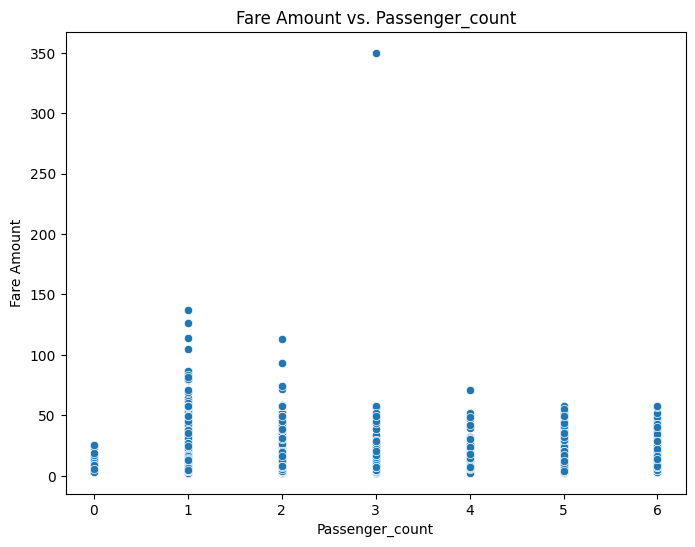

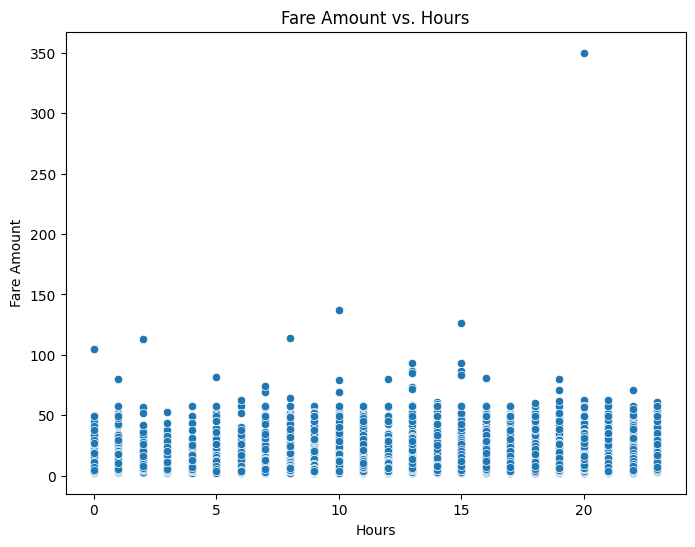

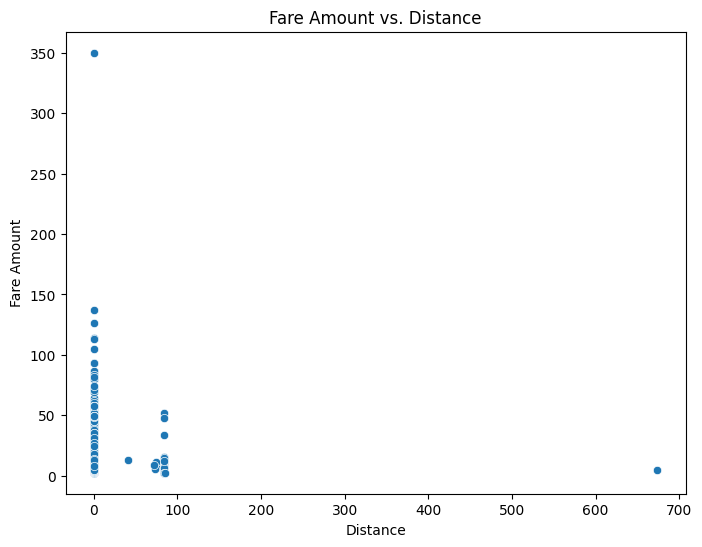

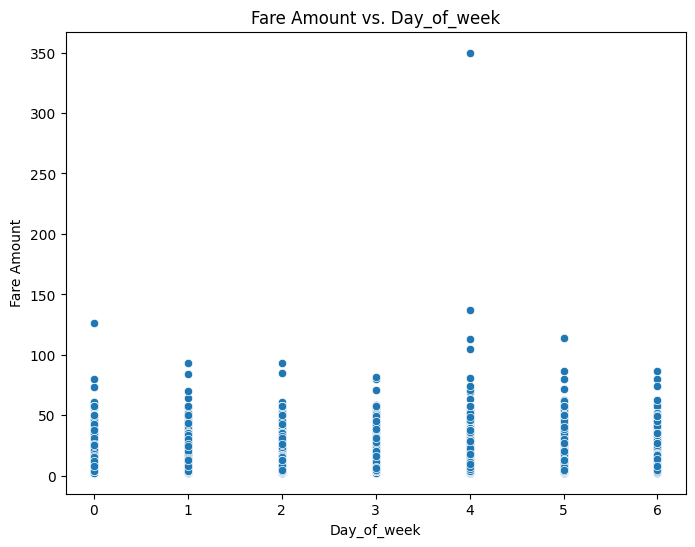

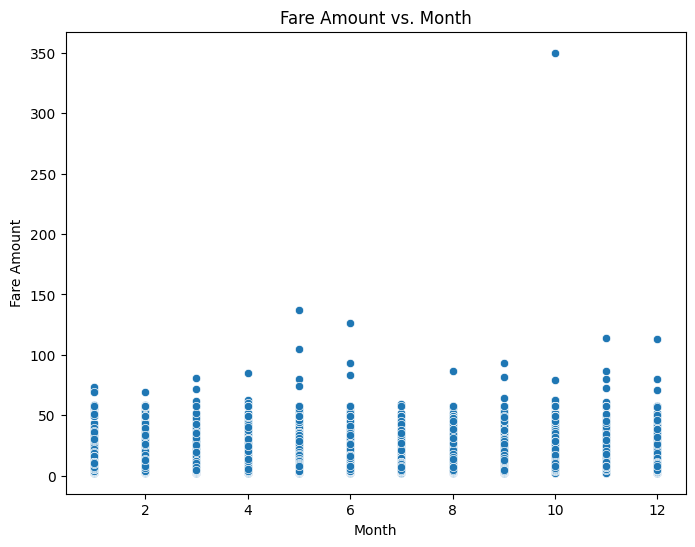

In [79]:
# Scatter Plots for Continuous Features vs. Fare Amount

continuous_features = ['passenger_count', 'hours', 'Distance','day_of_week', 'month']

for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='fare_amount', data=df)
    plt.title(f'Fare Amount vs. {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Fare Amount')
    plt.show()

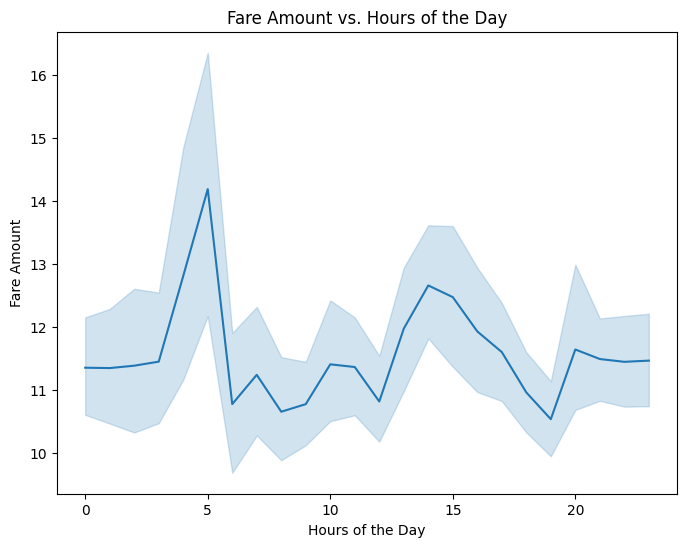

In [28]:
#  Line Plot for Fare Amount vs. Hours of the Day

plt.figure(figsize=(8, 6))
sns.lineplot(x='hours', y='fare_amount', data=df)
plt.title('Fare Amount vs. Hours of the Day')
plt.xlabel('Hours of the Day')
plt.ylabel('Fare Amount')
plt.show()


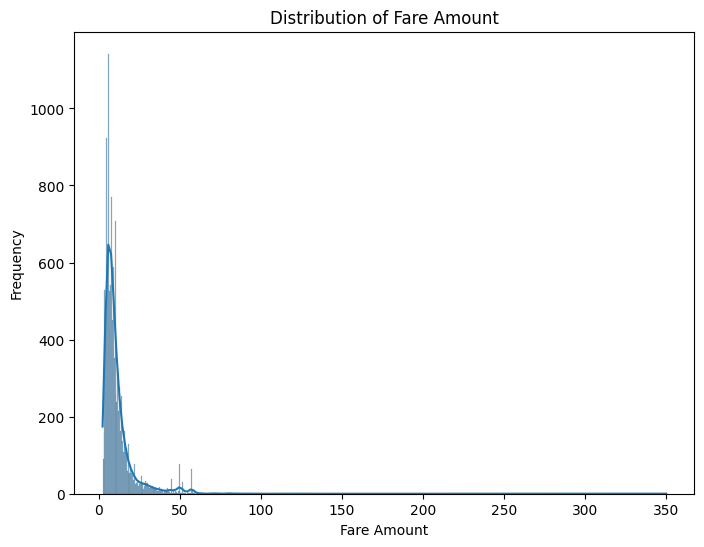

In [31]:
# Explore the Distribution of the Target Variable (Fare Amount)

plt.figure(figsize=(8, 6))
sns.histplot(df['fare_amount'], kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

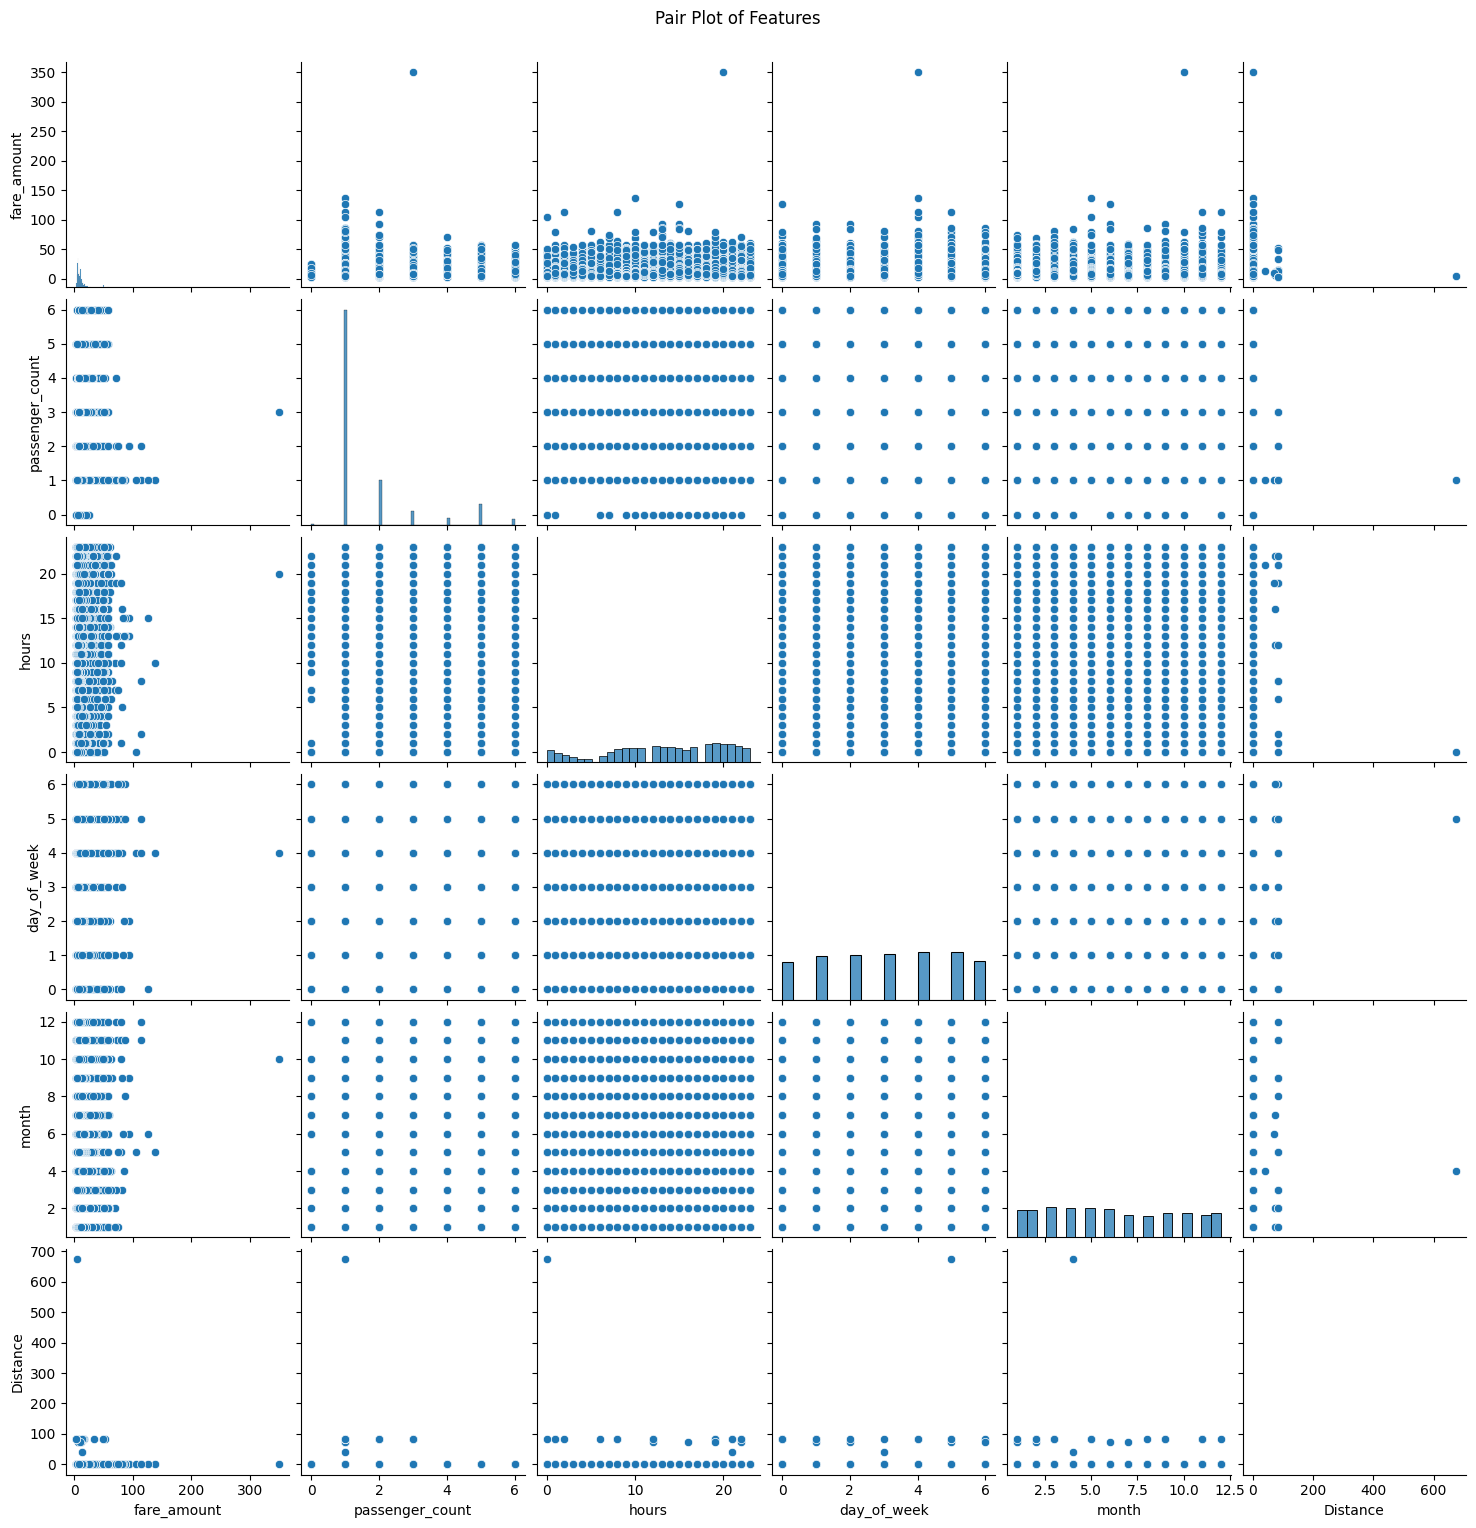

In [32]:
# Visualize Relationships between All Features

sns.pairplot(df)
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

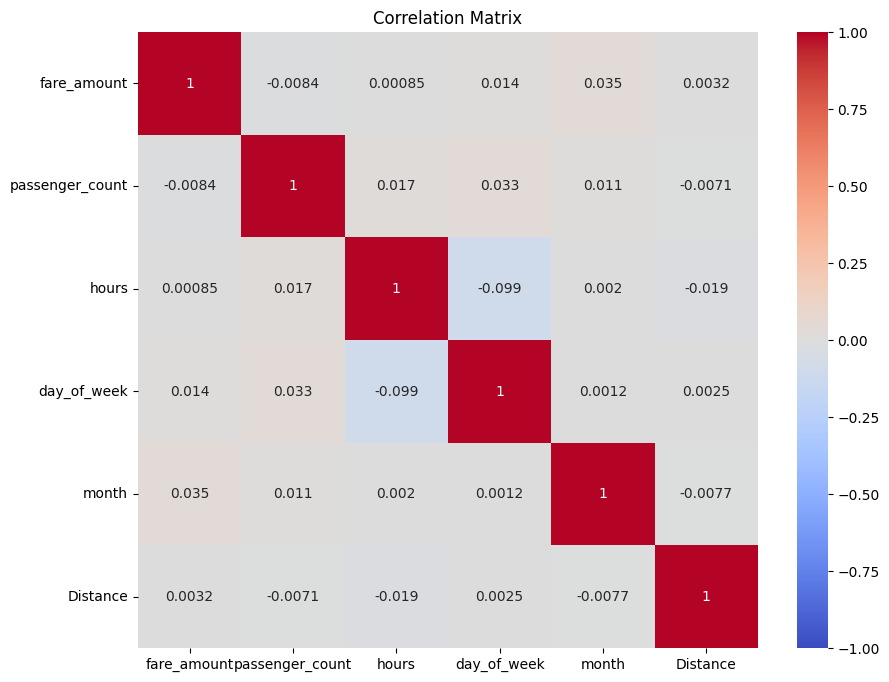

In [33]:
# Check Correlations between Features

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Find outliers and handle it

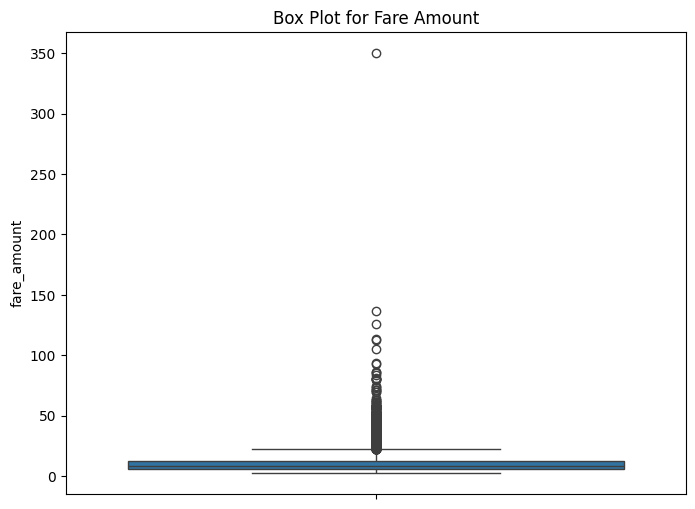

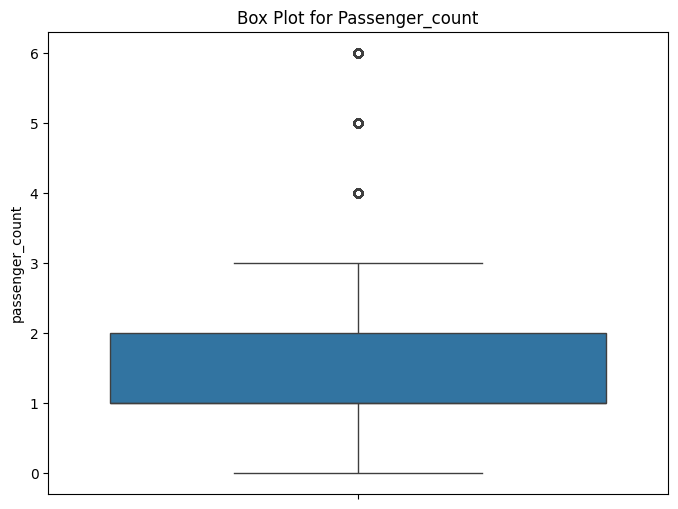

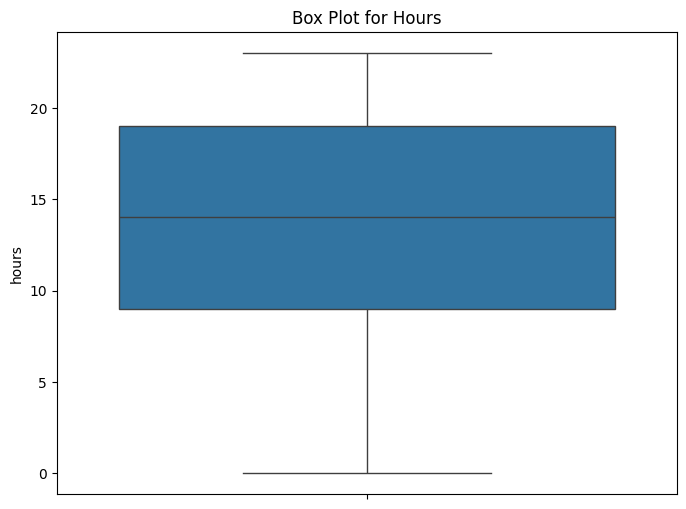

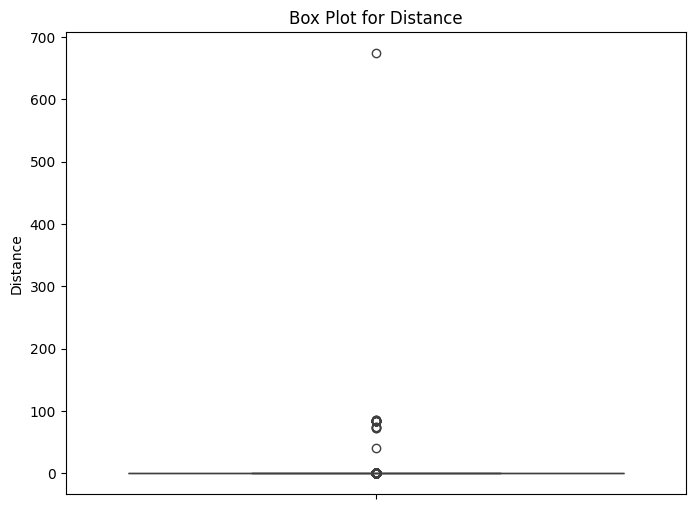

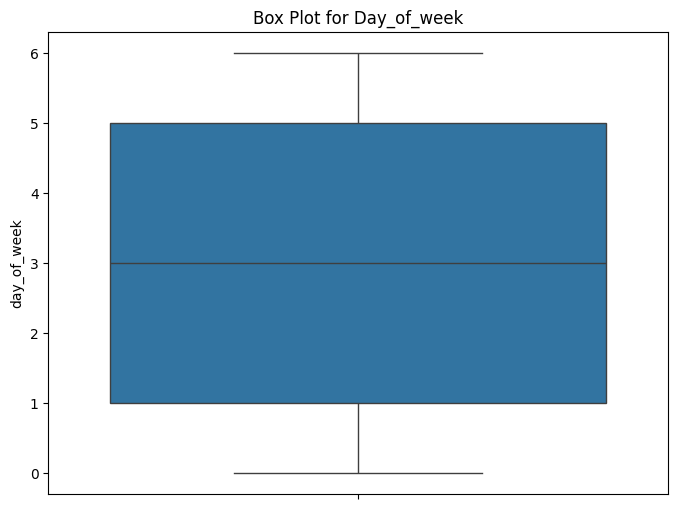

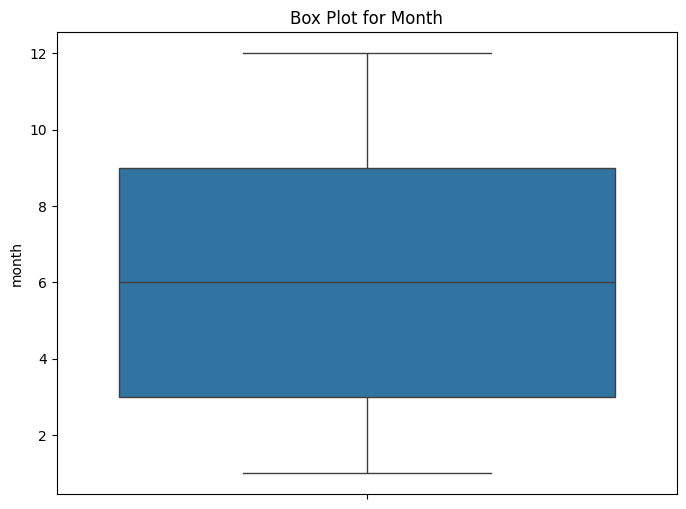

In [78]:
# Find outliers using boxplot

# Visualize outliers in 'fare_amount'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['fare_amount'])
plt.title('Box Plot for Fare Amount')
plt.show()

# Visualize outliers in continuous features
continuous_features = ['passenger_count', 'hours', 'Distance','day_of_week', 'month']

for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot for {feature.capitalize()}')
    plt.show()

In [81]:
# find outliers using mathamtics technique IQR

def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_fare_amount = identify_outliers_iqr(df, 'fare_amount')
print(outliers_fare_amount)

       fare_amount  passenger_count  hours  day_of_week  month  Distance  \
6            24.50              5.0      7            6     10  0.120825   
30           25.70              4.0      9            5      5  0.120938   
34           39.50              4.0      6            2      6  0.113786   
39           29.00              1.0     17            3      2  0.105086   
48           56.80              1.0     22            3      1  0.000000   
...            ...              ...    ...          ...    ...       ...   
11684        49.57              1.0     17            6     10  0.220759   
11717        31.33              2.0     20            3      8  0.094399   
11735        27.00              1.0      0            5      7  0.125553   
11744        57.33              1.0     15            4      3  0.217116   
11756        24.50              1.0      8            1      4  0.075981   

       fare_amount_log  
6             3.238678  
30            3.284664  
34          

In [80]:
# Handle or remove the outliers and store the clean data in df_clean

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_clean = remove_outliers_iqr(df, 'fare_amount')

# Model Building

In [47]:
# split data into training and testing data

from sklearn.model_selection import train_test_split

In [82]:
# define the dependent and independent columns

X = df_clean[['passenger_count', 'hours', 'Distance','day_of_week',	'month']]
y = df_clean['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# For this data use random forest regressor

from sklearn.ensemble import RandomForestRegressor

In [65]:
# creating object for model and fit the data into the model

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [67]:
# predict the values using test data

y_pred = model.predict(X_test)
y_pred

array([ 4.345,  8.1  ,  6.111, ..., 16.353, 14.078, 10.52 ])

In [72]:
# find the accuracy or the score of the molel

model.score(X_train ,y_train) 

0.9496440349897276

In [69]:
# determine the errors using mean square error method

from sklearn.metrics import mean_squared_error

In [73]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {model.score(X_test, y_test)}')

Mean Squared Error: 6.155230782118466
R^2 Score: 0.6485396103351067


In [75]:
# The joblib liabrary used for save the model for use in future

import joblib

# Save the model to a file
joblib_file = "uber_price_model.joblib" # create a name for your model
joblib.dump(model, joblib_file)

['uber_price_model.joblib']

## Conclusion

* This analysis provides valuable insights into the factors affecting Uber ride prices in [City/Region]. 
* By understanding these factors, we can better predict ride prices and optimize strategies for both riders and drivers. 
* The Random Forest model built in this analysis achieved an R^2 score of {r2}, indicating [interpretation of model performance].

Thank you for reading this analysis. Feel free to reach out with any questions or comments.
